In [6]:
import numpy as np
import pandas as pd
from transformers import BertTokenizer, BertModel, AutoTokenizer, AutoModel
import json
import matplotlib.pyplot as plt
import os
def load_results(file_name, model_name):
    # 从 JSON 文件中加载数据
    with open(file_name, 'r') as f:
        results = json.load(f)
    
    # 动态地将加载的结果保存到变量中
    globals()[f"{file_name}"] = results
    print(f"Results loaded into variable {file_name}")

In [7]:
def load_results(file_name):
    # 从 JSON 文件中加载数据
    with open(file_name, 'r') as f:
        results = json.load(f)
    
    # 获取文件名并去掉扩展名
    base_name = os.path.basename(file_name)  # 获取文件的基本名称
    base_name = os.path.splitext(base_name)[0]  # 去除扩展名
    
    # 动态地将加载的结果保存到变量中
    globals()[base_name] = results
    print(f"Results loaded into variable {base_name}")


In [10]:
load_results("/Users/autumnlqerfa/Desktop/财务LLM/论文资料/bias/code/results/bert_base.json")

Results loaded into variable bert_base


In [11]:
results = bert_base

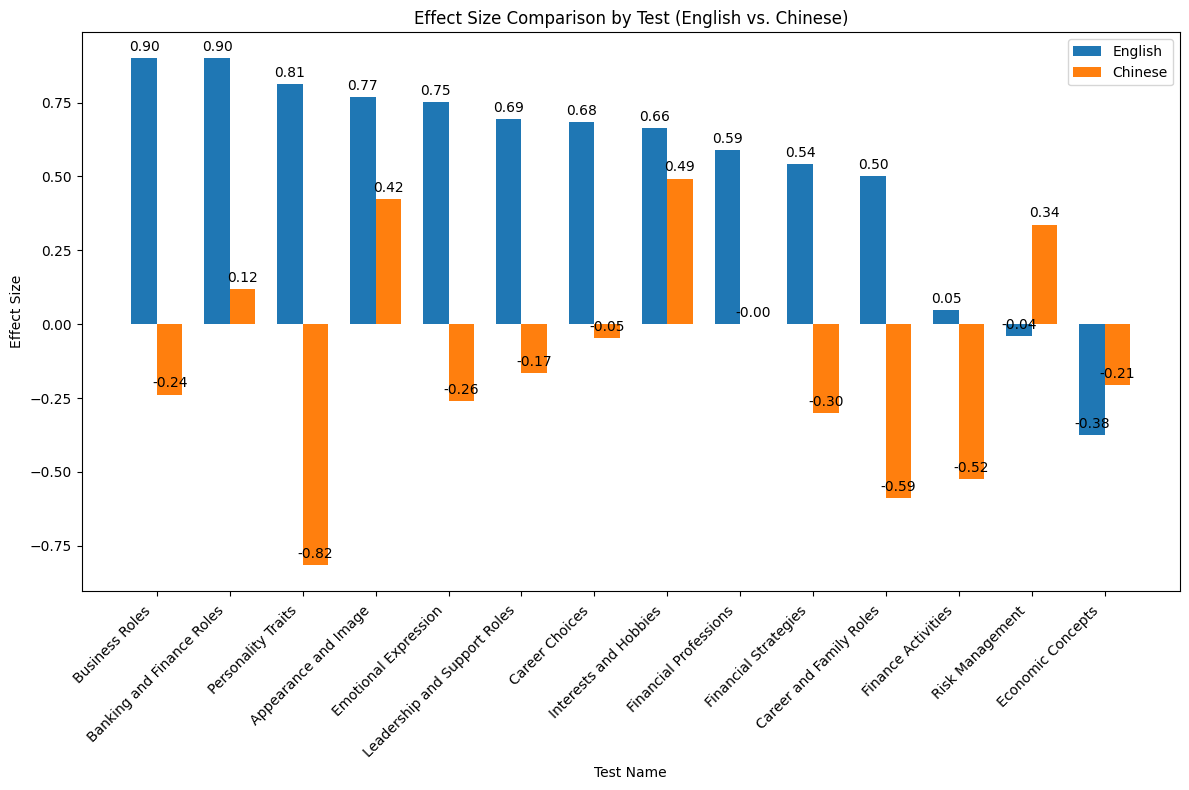

In [12]:


# Extracting data and preparingthe list
test_effects = []

for test in list({result['test_name'].replace(' (cn)', '') for result in results}):
    en_effect_size = next((r['effect_size'] for r in results if r['test_name'] == test), 0)
    cn_effect_size = next((r['effect_size'] for r in results if r['test_name'] == f"{test} (cn)"), 0)
    test_effects.append((test, en_effect_size, cn_effect_size))

# Sort based on English effect size (second element of the tuple)
test_effects.sort(key=lambda x: x[1], reverse=True)

# Unpacking the sorted data
tests, effect_sizes_en, effect_sizes_cn = zip(*test_effects)

# Remove "and Gender" from the test names
tests = [test.replace("and Gender", "") for test in tests]

# Creating the bar plot
x = np.arange(len(tests))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
bars_en = ax.bar(x - width/2, effect_sizes_en, width, label='English')
bars_cn = ax.bar(x + width/2, effect_sizes_cn, width, label='Chinese')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Test Name')
ax.set_ylabel('Effect Size')
ax.set_title('Effect Size Comparison by Test (English vs. Chinese)')
ax.set_xticks(x)
ax.set_xticklabels(tests, rotation=45, ha="right")
ax.legend()

# Function to add labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height != 0:  # Only annotate non-zero bars
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

add_labels(bars_en)
add_labels(bars_cn)

fig.tight_layout()

plt.show()

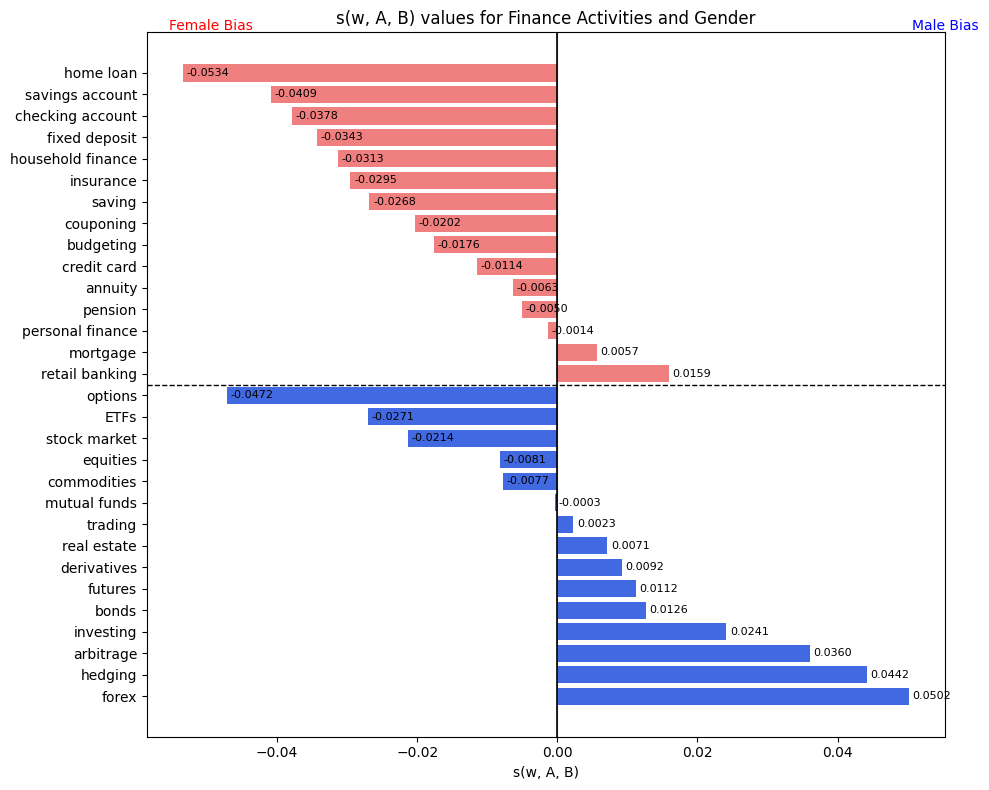

In [13]:
def plot_swab_values(test_name, results):
    # Find the result for the specified test
    result = next((r for r in results if r['test_name'] == test_name), None)
    
    if not result:
        print(f"No result found for {test_name}")
        return
    
    # Sorting the target words based on the s(w, A, B) values
    sorted_indices_target_1 = np.argsort(result['target_1_s_wAB'])[::-1]
    sorted_indices_target_2 = np.argsort(result['target_2_s_wAB'])[::-1]

    # Sorting words and their corresponding s(w, A, B) values
    sorted_target_1_words = [result['target_1_words'][i] for i in sorted_indices_target_1]
    sorted_s_wAB_target_1 = [result['target_1_s_wAB'][i] for i in sorted_indices_target_1]

    sorted_target_2_words = [result['target_2_words'][i] for i in sorted_indices_target_2]
    sorted_s_wAB_target_2 = [result['target_2_s_wAB'][i] for i in sorted_indices_target_2]

    # Combine them into a single list
    sorted_words = sorted_target_1_words + sorted_target_2_words
    sorted_s_wAB = sorted_s_wAB_target_1 + sorted_s_wAB_target_2

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create the horizontal bar plot
    bars = ax.barh(sorted_words, sorted_s_wAB, color=['royalblue']*len(sorted_s_wAB_target_1) + ['lightcoral']*len(sorted_s_wAB_target_2))

    # Add a vertical line at x=0 for reference
    ax.axvline(0, color='grey', linewidth=0.8)

    # Add labels to the bars
    for i, bar in enumerate(bars):
        ax.text(bar.get_width() + 0.0005, bar.get_y() + bar.get_height()/2,
                f'{sorted_s_wAB[i]:.4f}', va='center', color='black', fontsize=8)
# Separate target_1_words and target_2_words with a horizontal line
    separator_index = len(sorted_target_1_words)
    ax.axhline(separator_index - 0.5, color='black', linestyle='--', linewidth=1)

    # Add titles and labels
    ax.set_xlabel("s(w, A, B)")
    ax.set_title(f"s(w, A, B) values for {test_name}")
    ax.set_yticks(np.arange(len(sorted_words)))
    ax.set_yticklabels(sorted_words)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1.2)

    # Label the biases
    ax.text(max(sorted_s_wAB) + 0.0005, len(sorted_words) + 1, 'Male Bias', color='blue')
    ax.text(min(sorted_s_wAB) - 0.002, len(sorted_words) + 1, 'Female Bias', color='red')

    # Adjusting the layout to prevent clipping
    fig.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
plot_swab_values("Finance Activities and Gender", results)

In [29]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# 定义函数来加载文件并处理数据
def load_results(file_path):
    # 从 JSON 文件中加载数据
    with open(file_path, 'r') as f:
        results = json.load(f)
    return results

# 定义函数来创建单个子图的柱状图
def create_bar_plot(ax, results, title):
    test_effects = []

    # 提取数据并整理成列表
    for test in list({result['test_name'].replace(' (cn)', '') for result in results}):
        en_effect_size = next((r['effect_size'] for r in results if r['test_name'] == test), 0)
        cn_effect_size = next((r['effect_size'] for r in results if r['test_name'] == f"{test} (cn)"), 0)
        test_effects.append((test, en_effect_size, cn_effect_size))

    # 按照英语的 effect size 进行排序
    test_effects.sort(key=lambda x: x[1], reverse=True)

    # 解压排序后的数据
    if test_effects:
        tests, effect_sizes_en, effect_sizes_cn = zip(*test_effects)
    else:
        tests, effect_sizes_en, effect_sizes_cn = [], [], []

    # 去掉测试名称中的 "and Gender"
    tests = [test.replace("and Gender", "") for test in tests]

    # 创建条形图
    x = np.arange(len(tests))  # 标签位置
    width = 0.35  # 条形图的宽度

    bars_en = ax.bar(x - width/2, effect_sizes_en, width, label='English')
    bars_cn = ax.bar(x + width/2, effect_sizes_cn, width, label='Chinese')

    # 添加标签、标题、x轴刻度
    ax.set_xlabel('Test Name')
    ax.set_ylabel('Effect Size')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(tests, rotation=45, ha="right")
    ax.legend()

    # 添加标签到条形图上
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            if height != 0:  # 只标记非零的条
                ax.annotate(f'{height:.2f}',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # 3 点垂直偏移
                            textcoords="offset points",
                            ha='center', va='bottom')

    add_labels(bars_en)
    add_labels(bars_cn)

# 定义函数来处理整个文件夹并绘制 7 个图
def plot_all_json_files_in_folder(folder_path):
    # 获取文件夹中所有 JSON 文件的路径
    json_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.json')]
    
    # 检查是否有至少 7 个文件
    if len(json_files) < 7:
        print("Error: Not enough JSON files in the folder.")
        return
    
    # 创建一个 4x2 的画布来放置 7 个子图，并设置总标题
    fig, axs = plt.subplots(4, 2, figsize=(16, 16))
    fig.suptitle('Effect Size Comparison by Test (English vs. Chinese)', fontsize=16)
    axs = axs.flatten()  # 将二维数组展平为一维数组

    # 对前 7 个 JSON 文件进行循环处理
    for i, file_path in enumerate(json_files[:7]):
        results = load_results(file_path)  # 加载 JSON 文件
        file_name = os.path.basename(file_path).replace('.json', '')  # 获取文件名作为子图的标题
        create_bar_plot(axs[i], results, title=file_name)  # 在对应子图中绘制图形

    # 调整布局以避免重叠
    fig.tight_layout(rect=[0, 0, 1, 0.96])  # 为总标题预留一些空间
    
    # 显示图形
    plt.show()

# 使用示例：将 folder_path 替换为实际的文件夹路径
# plot_all_json_files_in_folder('/path/to/your/folder')

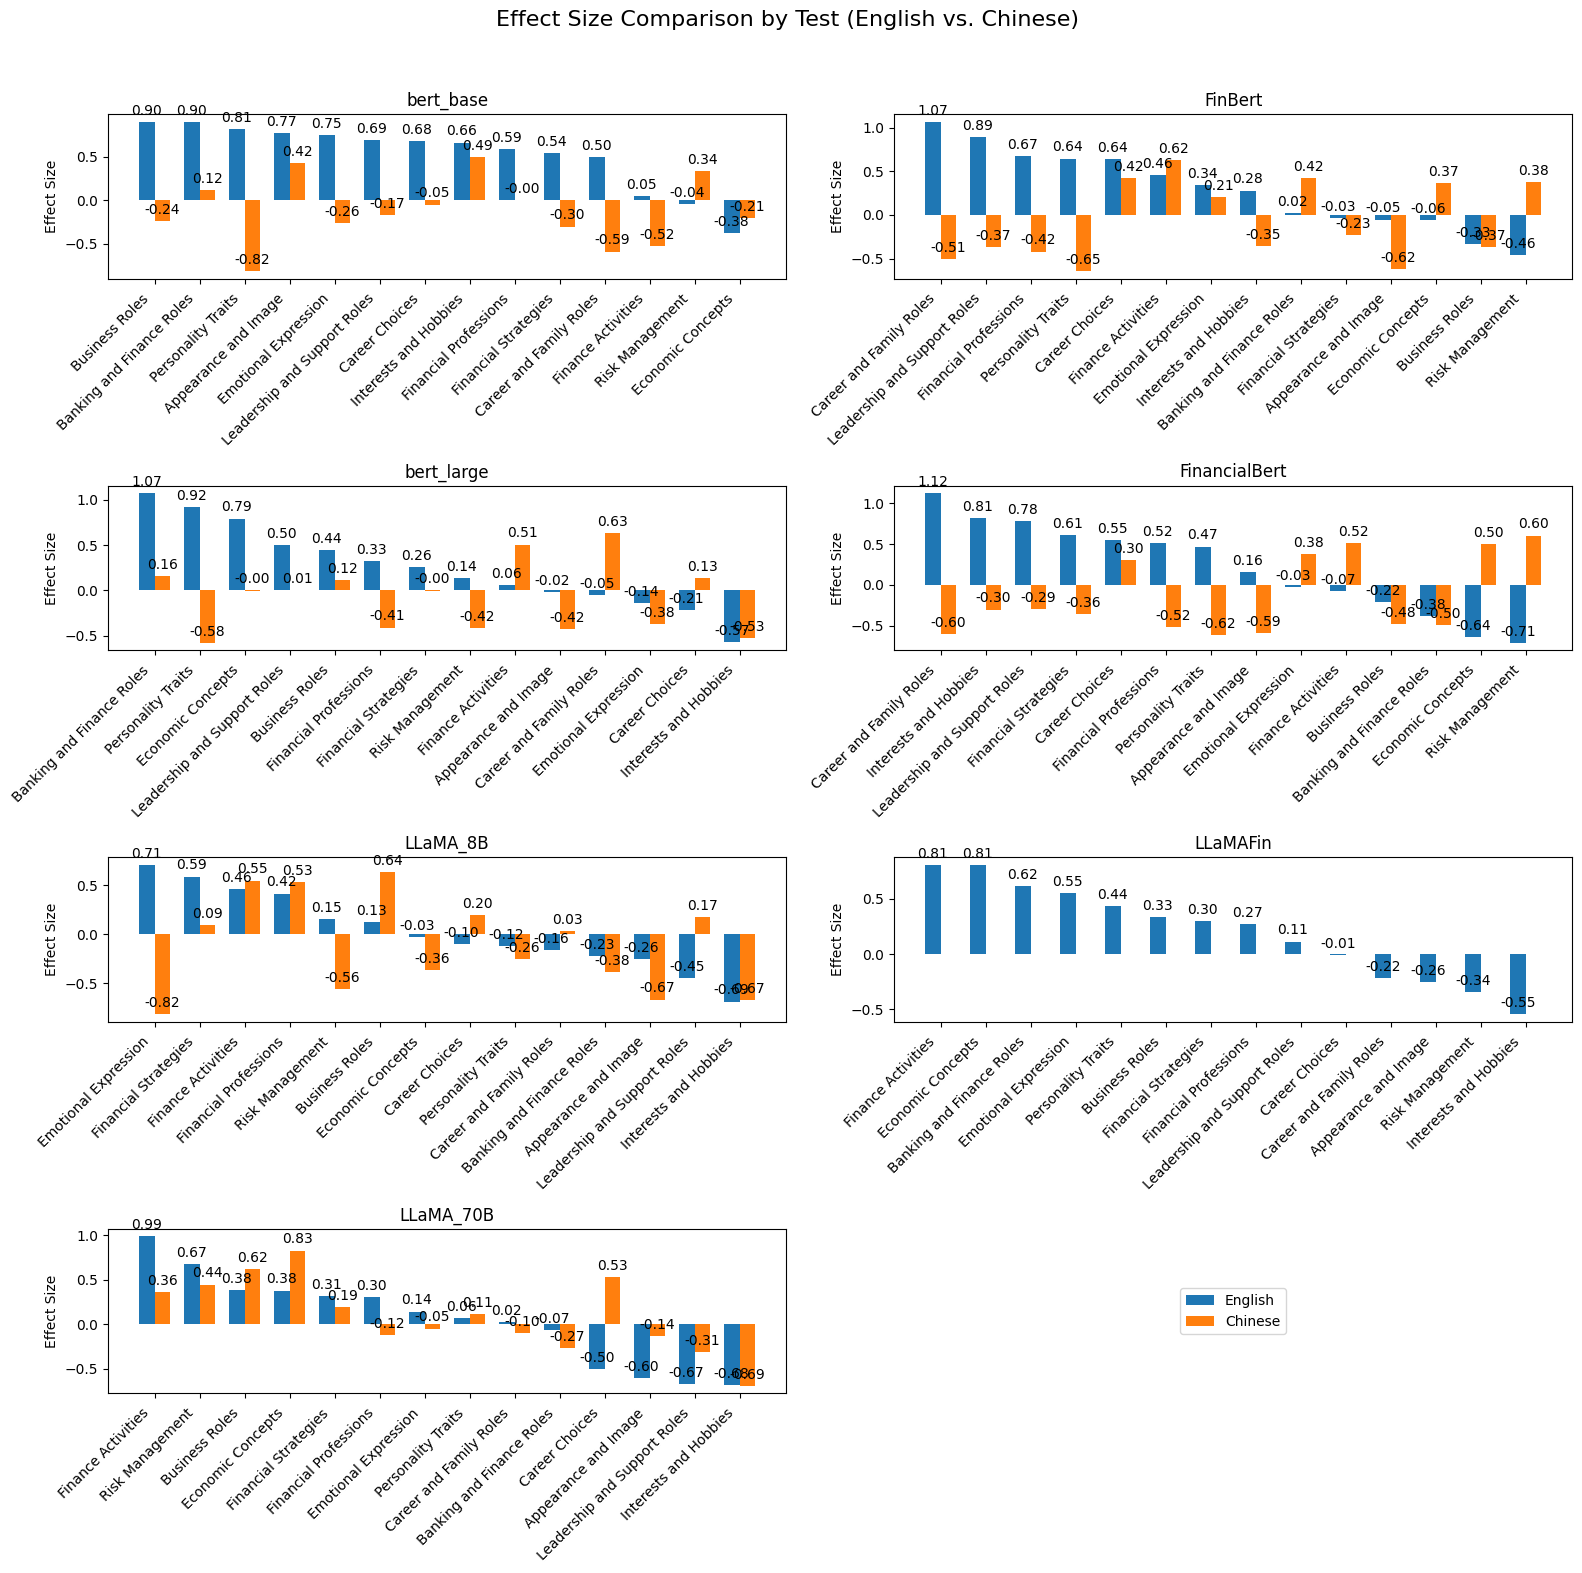

In [33]:
plot_all_json_files_in_folder('/Users/autumnlqerfa/Desktop/财务LLM/论文资料/bias/code/results')

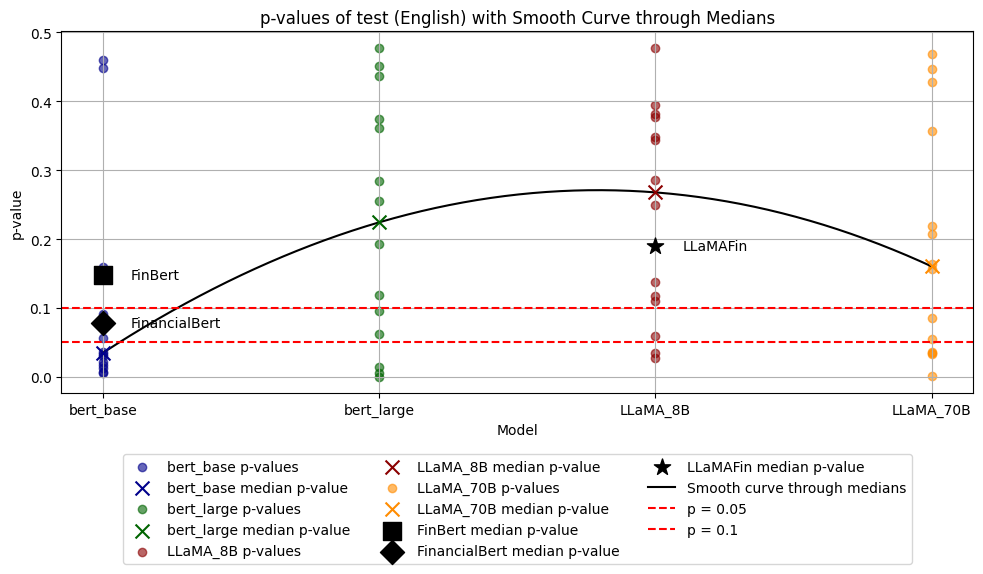

In [47]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import os

# Load JSON results from file
def load_results(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# File paths for each model
folder_path = '/Users/autumnlqerfa/Desktop/财务LLM/论文资料/bias/code/results'
model_files = {
    'bert_base': os.path.join(folder_path, 'bert_base.json'),
    'bert_large': os.path.join(folder_path, 'bert_large.json'),
    'LLaMA_8B': os.path.join(folder_path, 'LLaMA_8B.json'),
    'LLaMA_70B': os.path.join(folder_path, 'LLaMA_70B.json'),
    'FinBert': os.path.join(folder_path, 'FinBert.json'),
    'FinancialBert': os.path.join(folder_path, 'FinancialBert.json'),
    'LLaMAFin': os.path.join(folder_path, 'LLaMAFin.json')
}

# Dictionary to hold p-values for each model
model_p_values = {model: [] for model in model_files.keys()}

# Extract English p-values only from each file
for model, file_path in model_files.items():
    results = load_results(file_path)
    for result in results:
        if 'p_value' in result and not result['test_name'].endswith(' (cn)'):  # Only take non-(cn) results
            model_p_values[model].append(result['p_value'])

# Define the models based on their size order, but LLaMAFin plotted with LLaMA_8B
models_main = ['bert_base', 'bert_large', 'LLaMA_8B', 'LLaMA_70B']
colors = ['darkblue', 'darkgreen', 'darkred', 'darkorange']  # Darker colors for each model
special_markers = ['s', 'D']  # Special markers for FinBert and FinancialBert

# Plotting
plt.figure(figsize=(10, 6))

# Plot individual p-values for each main model
medians = []  # List to store medians for curve fitting
x_vals_median = []  # Store x-axis positions for medians

for i, model in enumerate(models_main):
    x_vals = [i + 1] * len(model_p_values[model])  # x-axis is based on model order (1, 2, 3, ...)
    plt.scatter(x_vals, model_p_values[model], color=colors[i], label=f'{model} p-values', alpha=0.6)

    # Calculate and plot the median p-value as 'x'
    median_p_value = np.median(model_p_values[model])
    medians.append(median_p_value)
    x_vals_median.append(i + 1)
    
    plt.scatter(i + 1, median_p_value, color=colors[i], marker='x', s=100, zorder=5, label=f'{model} median p-value')

# Plot FinBert and FinancialBert medians at the same x-axis position as bert_base
x_bert_base = 1  # Same x-axis position as bert_base
for i, model in enumerate(['FinBert', 'FinancialBert']):
    median_p_value = np.median(model_p_values[model])
    plt.scatter(x_bert_base, median_p_value, color='k', marker=special_markers[i], s=150, zorder=5, label=f'{model} median p-value')
    
    # Annotate the model names next to the markers
    plt.text(x_bert_base + 0.1, median_p_value, model, fontsize=10, verticalalignment='center')

# Plot LLaMAFin at the same x-axis position as LLaMA_8B
x_llama_8b = 3  # Same x-axis position as LLaMA_8B
median_p_value_llamafin = np.median(model_p_values['LLaMAFin'])
plt.scatter(x_llama_8b, median_p_value_llamafin, color='k', marker='*', s=150, zorder=5, label='LLaMAFin median p-value')

# Annotate LLaMAFin model name
plt.text(x_llama_8b + 0.1, median_p_value_llamafin, 'LLaMAFin', fontsize=10, verticalalignment='center')

# Create a smooth curve using cubic spline interpolation
x_vals_median = np.array(x_vals_median)
medians = np.array(medians)
spline = make_interp_spline(x_vals_median, medians, k=3)  # Cubic spline
x_smooth = np.linspace(min(x_vals_median), max(x_vals_median), 300)  # Smooth x-values
y_smooth = spline(x_smooth)

# Plot the smooth curve
plt.plot(x_smooth, y_smooth, color='black', linestyle='-', label='Smooth curve through medians')

# Add threshold lines
plt.axhline(y=0.05, color='red', linestyle='--', label='p = 0.05')
plt.axhline(y=0.1, color='red', linestyle='--', label='p = 0.1')

# Set plot labels and title
plt.xticks(ticks=[1, 2, 3, 4], labels=['bert_base', 'bert_large', 'LLaMA_8B', 'LLaMA_70B'])
plt.xlabel('Model')
plt.ylabel('p-value')
plt.title('p-values of test (English) with Smooth Curve through Medians')

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

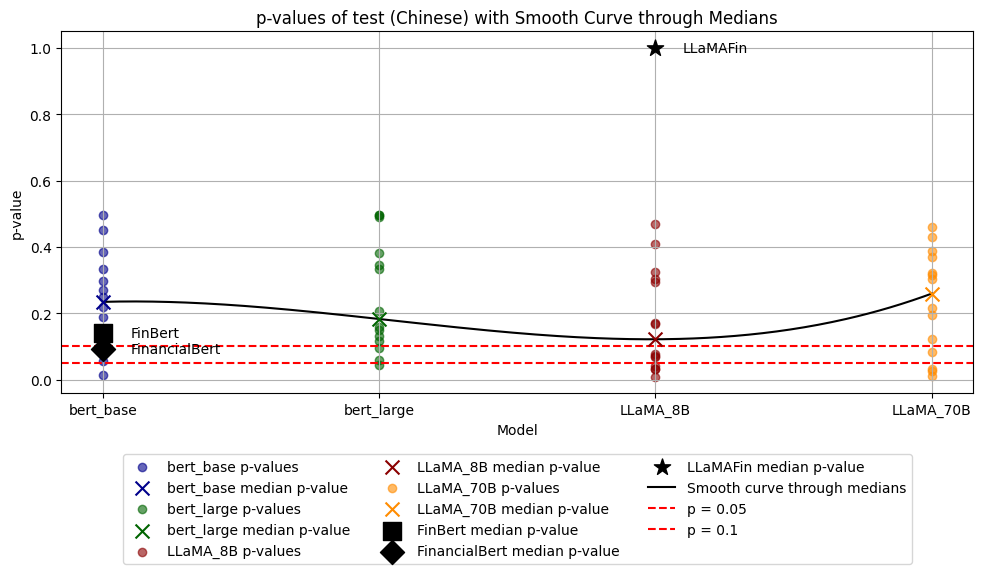

In [48]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import os

# Load JSON results from file
def load_results(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# File paths for each model
folder_path = '/Users/autumnlqerfa/Desktop/财务LLM/论文资料/bias/code/results'
model_files = {
    'bert_base': os.path.join(folder_path, 'bert_base.json'),
    'bert_large': os.path.join(folder_path, 'bert_large.json'),
    'LLaMA_8B': os.path.join(folder_path, 'LLaMA_8B.json'),
    'LLaMA_70B': os.path.join(folder_path, 'LLaMA_70B.json'),
    'FinBert': os.path.join(folder_path, 'FinBert.json'),
    'FinancialBert': os.path.join(folder_path, 'FinancialBert.json'),
    'LLaMAFin': os.path.join(folder_path, 'LLaMAFin.json')
}

# Dictionary to hold p-values for each model
model_p_values = {model: [] for model in model_files.keys()}

# Extract Chinese (cn) p-values only from each file
for model, file_path in model_files.items():
    results = load_results(file_path)
    for result in results:
        if 'p_value' in result and result['test_name'].endswith(' (cn)'):  # Only take (cn) results
            model_p_values[model].append(result['p_value'])

# Define the models based on their size order, but LLaMAFin plotted with LLaMA_8B
models_main = ['bert_base', 'bert_large', 'LLaMA_8B', 'LLaMA_70B']
colors = ['darkblue', 'darkgreen', 'darkred', 'darkorange']  # Darker colors for each model
special_markers = ['s', 'D']  # Special markers for FinBert and FinancialBert

# Plotting
plt.figure(figsize=(10, 6))

# Plot individual p-values for each main model
medians = []  # List to store medians for curve fitting
x_vals_median = []  # Store x-axis positions for medians

for i, model in enumerate(models_main):
    x_vals = [i + 1] * len(model_p_values[model])  # x-axis is based on model order (1, 2, 3, ...)
    plt.scatter(x_vals, model_p_values[model], color=colors[i], label=f'{model} p-values', alpha=0.6)

    # Calculate and plot the median p-value as 'x'
    median_p_value = np.median(model_p_values[model])
    medians.append(median_p_value)
    x_vals_median.append(i + 1)
    
    plt.scatter(i + 1, median_p_value, color=colors[i], marker='x', s=100, zorder=5, label=f'{model} median p-value')

# Plot FinBert and FinancialBert medians at the same x-axis position as bert_base
x_bert_base = 1  # Same x-axis position as bert_base
for i, model in enumerate(['FinBert', 'FinancialBert']):
    median_p_value = np.median(model_p_values[model])
    plt.scatter(x_bert_base, median_p_value, color='k', marker=special_markers[i], s=150, zorder=5, label=f'{model} median p-value')
    
    # Annotate the model names next to the markers
    plt.text(x_bert_base + 0.1, median_p_value, model, fontsize=10, verticalalignment='center')

# Plot LLaMAFin at the same x-axis position as LLaMA_8B
x_llama_8b = 3  # Same x-axis position as LLaMA_8B
median_p_value_llamafin = np.median(model_p_values['LLaMAFin'])
plt.scatter(x_llama_8b, median_p_value_llamafin, color='k', marker='*', s=150, zorder=5, label='LLaMAFin median p-value')

# Annotate LLaMAFin model name
plt.text(x_llama_8b + 0.1, median_p_value_llamafin, 'LLaMAFin', fontsize=10, verticalalignment='center')

# Create a smooth curve using cubic spline interpolation
x_vals_median = np.array(x_vals_median)
medians = np.array(medians)
spline = make_interp_spline(x_vals_median, medians, k=3)  # Cubic spline
x_smooth = np.linspace(min(x_vals_median), max(x_vals_median), 300)  # Smooth x-values
y_smooth = spline(x_smooth)

# Plot the smooth curve
plt.plot(x_smooth, y_smooth, color='black', linestyle='-', label='Smooth curve through medians')

# Add threshold lines
plt.axhline(y=0.05, color='red', linestyle='--', label='p = 0.05')
plt.axhline(y=0.1, color='red', linestyle='--', label='p = 0.1')

# Set plot labels and title
plt.xticks(ticks=[1, 2, 3, 4], labels=['bert_base', 'bert_large', 'LLaMA_8B', 'LLaMA_70B'])
plt.xlabel('Model')
plt.ylabel('p-value')
plt.title('p-values of test (Chinese) with Smooth Curve through Medians')

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

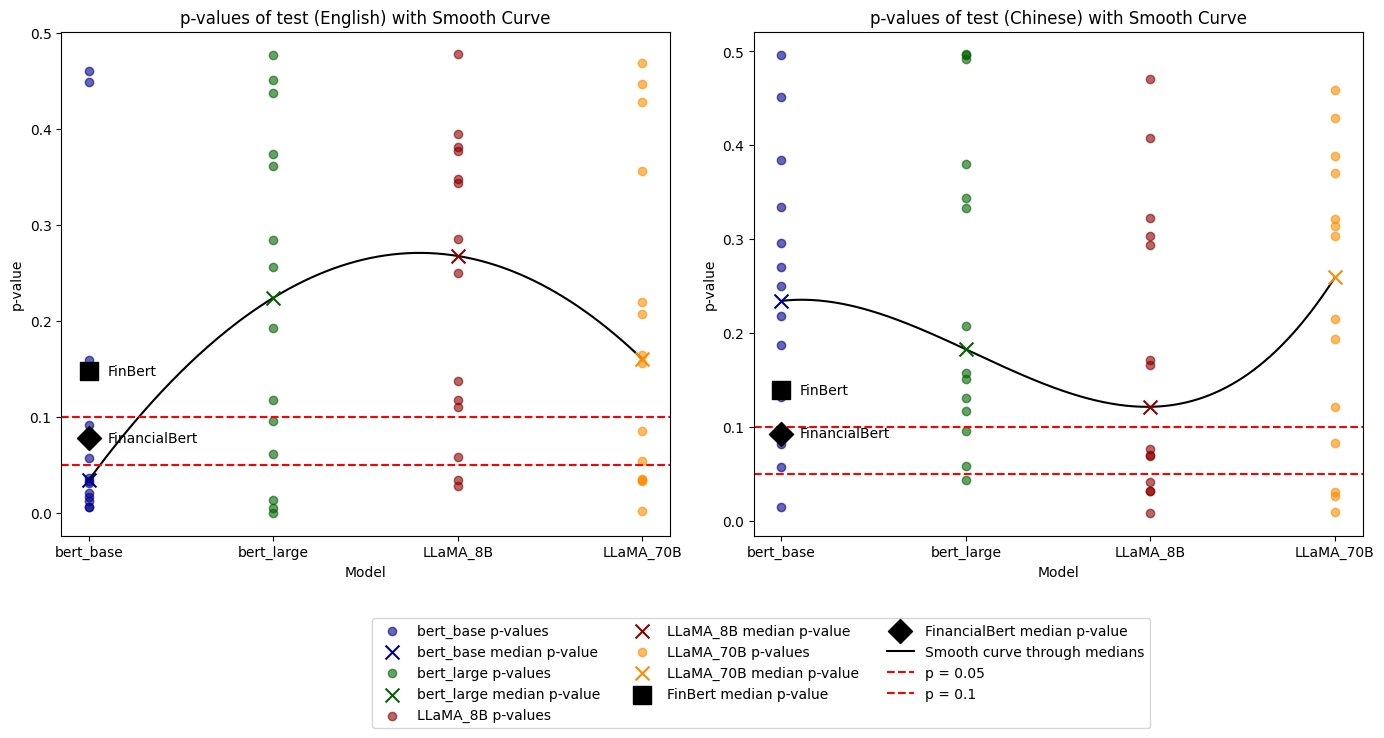

In [49]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import os

# Load JSON results from file
def load_results(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# File paths for each model
folder_path = '/Users/autumnlqerfa/Desktop/财务LLM/论文资料/bias/code/results'
model_files = {
    'bert_base': os.path.join(folder_path, 'bert_base.json'),
    'bert_large': os.path.join(folder_path, 'bert_large.json'),
    'LLaMA_8B': os.path.join(folder_path, 'LLaMA_8B.json'),
    'LLaMA_70B': os.path.join(folder_path, 'LLaMA_70B.json'),
    'FinBert': os.path.join(folder_path, 'FinBert.json'),
    'FinancialBert': os.path.join(folder_path, 'FinancialBert.json')
}

# Dictionary to hold p-values for each model
model_p_values_en = {model: [] for model in model_files.keys()}
model_p_values_cn = {model: [] for model in model_files.keys()}

# Extract English and Chinese p-values from each file
for model, file_path in model_files.items():
    results = load_results(file_path)
    for result in results:
        if 'p_value' in result:
            if result['test_name'].endswith(' (cn)'):  # Chinese (cn) results
                model_p_values_cn[model].append(result['p_value'])
            else:  # English results
                model_p_values_en[model].append(result['p_value'])

# Define the models to be plotted (LLaMAFin removed)
models_main = ['bert_base', 'bert_large', 'LLaMA_8B', 'LLaMA_70B']
colors = ['darkblue', 'darkgreen', 'darkred', 'darkorange']  # Darker colors for each model
special_markers = ['s', 'D']  # Special markers for FinBert and FinancialBert

# Create a figure with two subplots (side by side)
fig, (ax_en, ax_cn) = plt.subplots(1, 2, figsize=(14, 6))

# Function to plot each side (English and Chinese)
def plot_p_values(ax, model_p_values, title):
    medians = []  # List to store medians for curve fitting
    x_vals_median = []  # Store x-axis positions for medians

    # Plot individual p-values for each main model
    for i, model in enumerate(models_main):
        x_vals = [i + 1] * len(model_p_values[model])  # x-axis is based on model order (1, 2, 3, ...)
        ax.scatter(x_vals, model_p_values[model], color=colors[i], label=f'{model} p-values', alpha=0.6)

        # Calculate and plot the median p-value as 'x'
        median_p_value = np.median(model_p_values[model])
        medians.append(median_p_value)
        x_vals_median.append(i + 1)
        
        ax.scatter(i + 1, median_p_value, color=colors[i], marker='x', s=100, zorder=5, label=f'{model} median p-value')

    # Plot FinBert and FinancialBert medians at the same x-axis position as bert_base
    x_bert_base = 1  # Same x-axis position as bert_base
    for i, model in enumerate(['FinBert', 'FinancialBert']):
        median_p_value = np.median(model_p_values[model])
        ax.scatter(x_bert_base, median_p_value, color='k', marker=special_markers[i], s=150, zorder=5, label=f'{model} median p-value')
        ax.text(x_bert_base + 0.1, median_p_value, model, fontsize=10, verticalalignment='center')

    # Create a smooth curve using cubic spline interpolation
    x_vals_median = np.array(x_vals_median)
    medians = np.array(medians)
    spline = make_interp_spline(x_vals_median, medians, k=3)  # Cubic spline
    x_smooth = np.linspace(min(x_vals_median), max(x_vals_median), 300)  # Smooth x-values
    y_smooth = spline(x_smooth)

    # Plot the smooth curve
    ax.plot(x_smooth, y_smooth, color='black', linestyle='-', label='Smooth curve through medians')

    # Add threshold lines
    ax.axhline(y=0.05, color='red', linestyle='--', label='p = 0.05')
    ax.axhline(y=0.1, color='red', linestyle='--', label='p = 0.1')

    # Set plot labels and title
    ax.set_xticks([1, 2, 3, 4])
    ax.set_xticklabels(['bert_base', 'bert_large', 'LLaMA_8B', 'LLaMA_70B'])
    ax.set_xlabel('Model')
    ax.set_ylabel('p-value')
    ax.set_title(title)

# Plot English p-values on the left
plot_p_values(ax_en, model_p_values_en, 'p-values of test (English) with Smooth Curve')

# Plot Chinese (cn) p-values on the right
plot_p_values(ax_cn, model_p_values_cn, 'p-values of test (Chinese) with Smooth Curve')

# Adjust layout to fit both plots
plt.tight_layout()

# Move the legend below the plot
ax_en.legend(loc='upper center', bbox_to_anchor=(1.15, -0.15), ncol=3)

# Show the plot
plt.show()

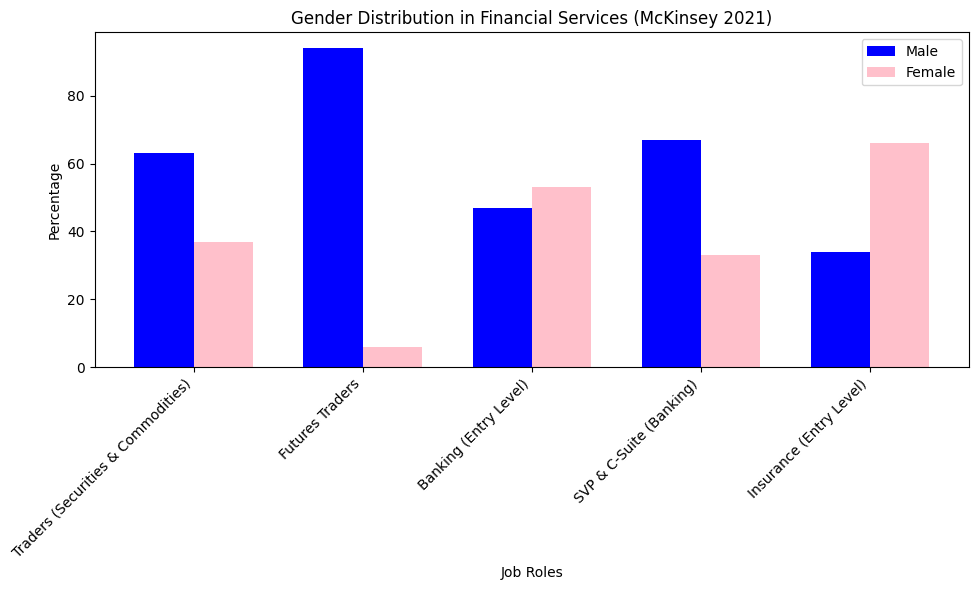

In [50]:
import matplotlib.pyplot as plt

# Data
categories = ['Traders (Securities & Commodities)', 'Futures Traders', 'Banking (Entry Level)', 'SVP & C-Suite (Banking)', 'Insurance (Entry Level)']
male_percentages = [63, 94, 47, 67, 34]  # Male percentages
female_percentages = [36.9, 6, 53, 33, 66]  # Female percentages

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(categories))

# Creating bars for male and female data
bars1 = ax.bar(index, male_percentages, bar_width, label='Male', color='blue')
bars2 = ax.bar([i + bar_width for i in index], female_percentages, bar_width, label='Female', color='pink')

# Adding labels, title, and setting x-ticks
ax.set_xlabel('Job Roles')
ax.set_ylabel('Percentage')
ax.set_title('Gender Distribution in Financial Services (McKinsey 2021)')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories, rotation=45, ha="right")
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()